In [1]:
import importlib
import os

import polars as pl
from dotenv import load_dotenv

import art.utils.benchmarking.charts
from art.utils.benchmarking.charts import (
    percentage_comparison_bar_chart,
    training_progress_chart,
)
from art.utils.benchmarking.load_trajectories import load_trajectories
from art.utils.benchmarking.types import BenchmarkModelKey
from art.utils.get_repo_root_path import get_repo_root_path
from art.utils.s3 import pull_model_from_s3

importlib.reload(art.utils.benchmarking.charts)

load_dotenv()

project_name = "email_agent"

PULL_MODELS = False
if PULL_MODELS:
    await pull_model_from_s3(
        model_name="email-agent-220",
        project=project_name,
    )
    await pull_model_from_s3(
        model_name="o3",
        project=project_name,
    )
    await pull_model_from_s3(
        model_name="o4-mini",
        project=project_name,
    )
    await pull_model_from_s3(
        model_name="gemini-2.5-pro",
        project=project_name,
    )
    await pull_model_from_s3(
        model_name="gpt-4.1",
        project=project_name,
    )

# await load_trajectories.bust_cache()
df = await load_trajectories(
    project_name=project_name,
    models=["email-agent-220", "o3", "o4-mini", "gemini-2.5-pro", "gpt-4.1"],
)

# filter to include up to step 1260
df = df.filter(pl.col("step") <= 1290)

benchmarks_dir = f"{get_repo_root_path()}/assets/benchmarks/{project_name}"

os.makedirs(benchmarks_dir, exist_ok=True)

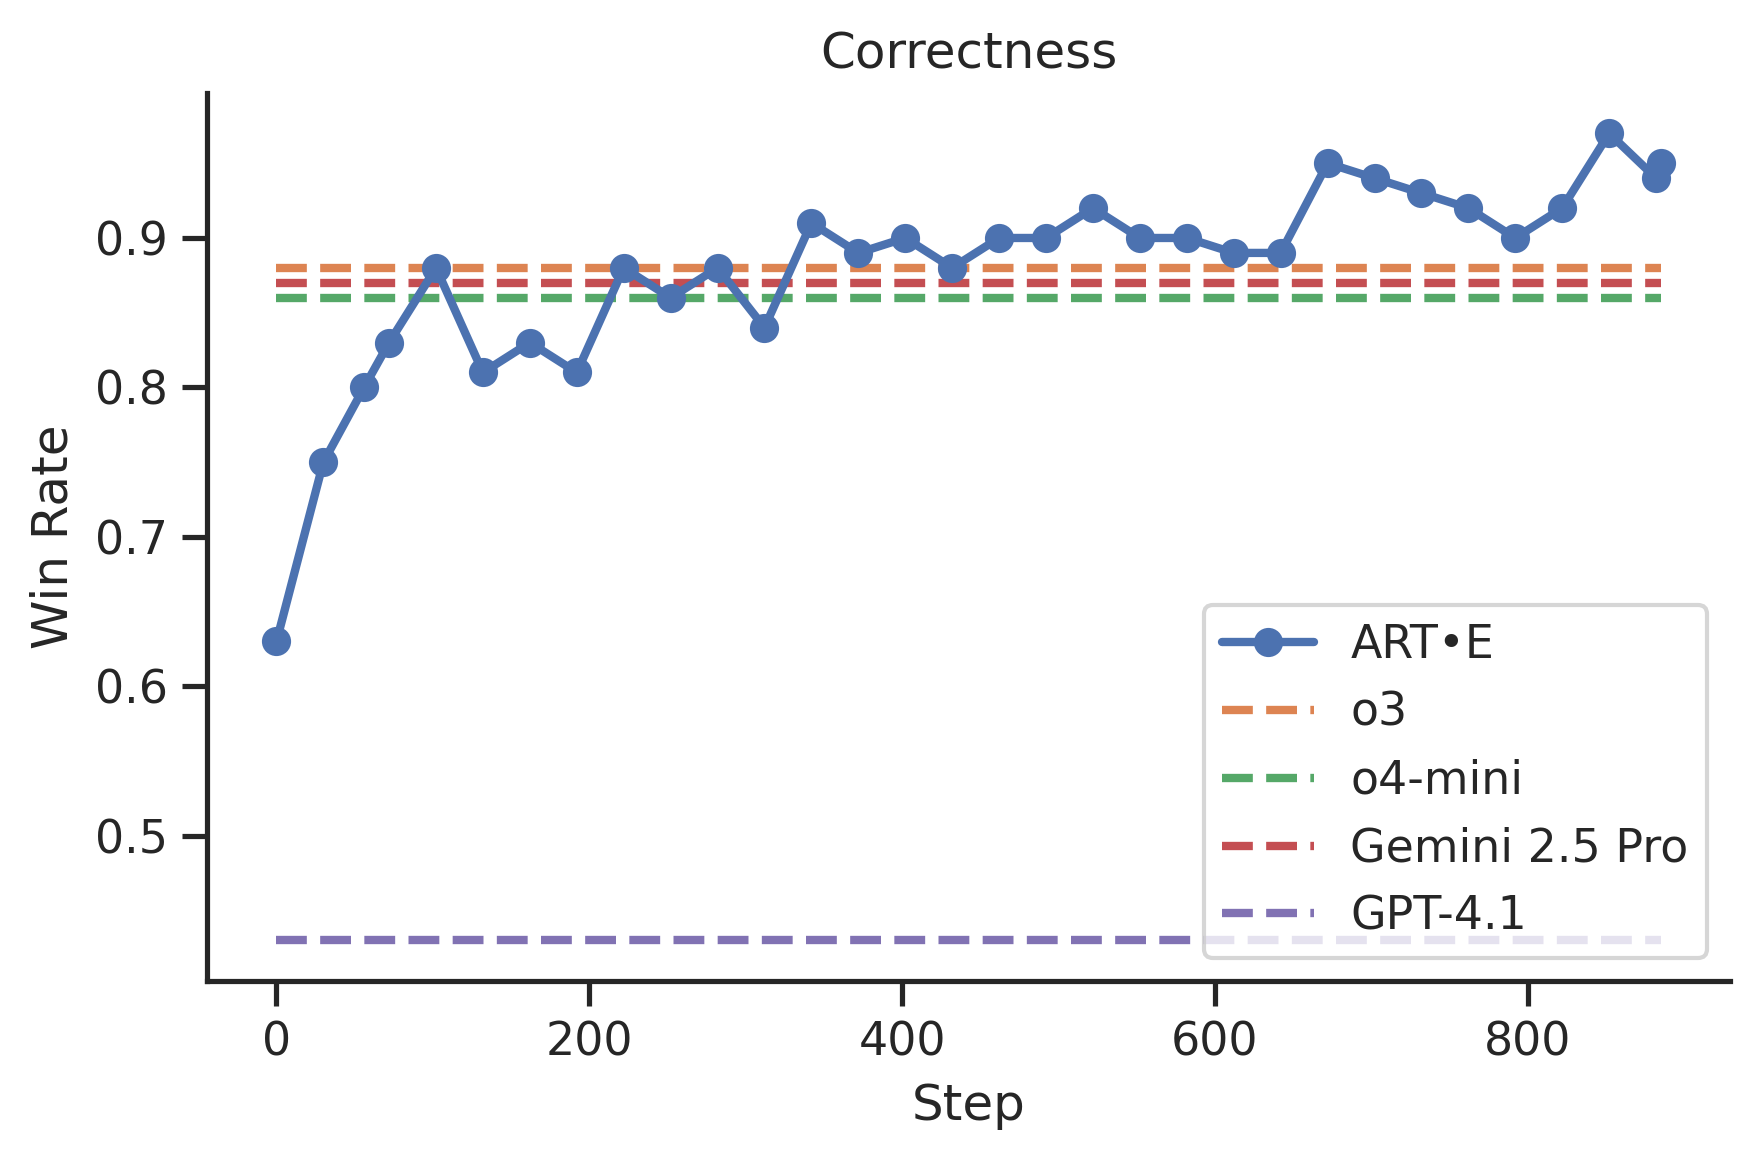

In [2]:
line_graph = training_progress_chart(
    df,
    "answer_correct",
    models=[
        BenchmarkModelKey("email-agent-220", "ART•E", "val"),
        BenchmarkModelKey("o3", "o3"),
        BenchmarkModelKey("o4-mini", "o4-mini"),
        BenchmarkModelKey("gemini-2.5-pro", "Gemini 2.5 Pro"),
        BenchmarkModelKey("gpt-4.1", "GPT-4.1"),
    ],
    title="Correctness",
    y_label="Win Rate",
)
line_graph.savefig(f"{benchmarks_dir}/accuracy-training-progress.svg")

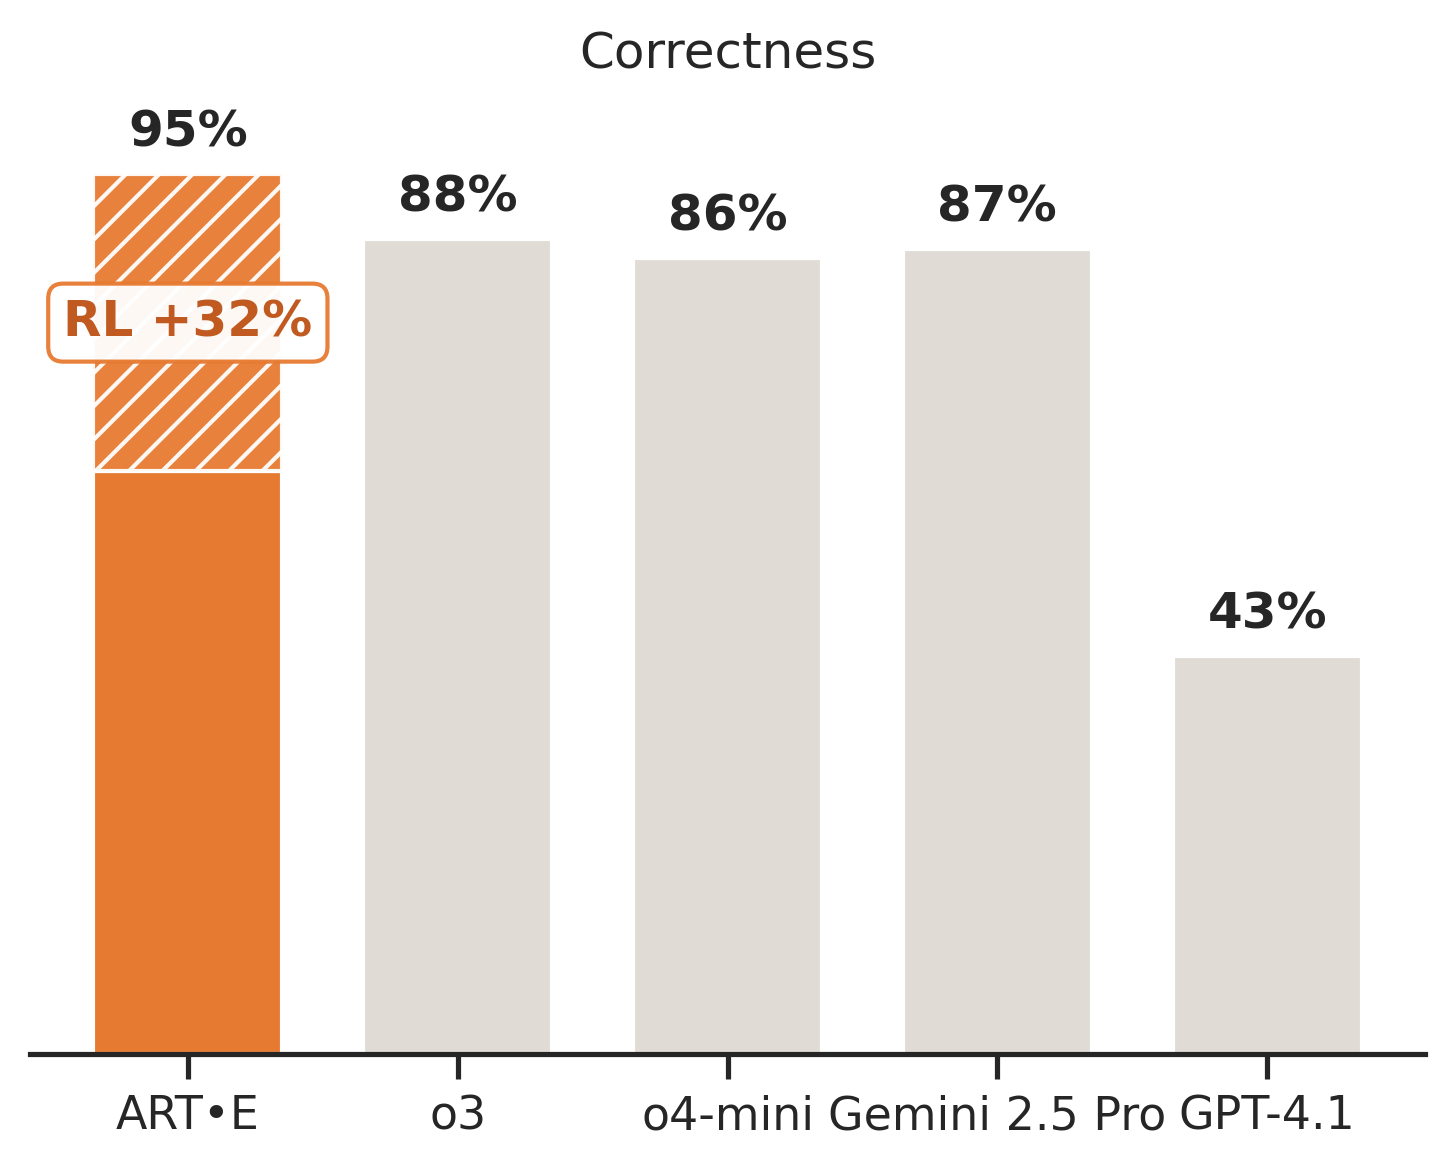

In [4]:
bar_chart = percentage_comparison_bar_chart(
    df,
    metric_name="answer_correct",
    models=[
        BenchmarkModelKey("email-agent-220", "ART•E", "val"),
        BenchmarkModelKey("o3", "o3"),
        BenchmarkModelKey("o4-mini", "o4-mini"),
        BenchmarkModelKey("gemini-2.5-pro", "Gemini 2.5 Pro"),
        BenchmarkModelKey("gpt-4.1", "GPT-4.1"),
    ],
    title="Correctness",
)
bar_chart.savefig(f"{benchmarks_dir}/accuracy-comparison.svg")